# Script for pattern recognition with Convoluted Neural Networks.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os.path
from os import path
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical

Using TensorFlow backend.


In [3]:
N_PHASES = 3
num_of_snaps_in_file = 502
visible_nodes = 100*100

# 0 - disordered
# 1 - ordered
# 2 - ordered with defects
input_snaps =  ['T042_R001','T042_R30', 'T042_R01', 'T042_R6', 'T042_R8', 'T042_R10', 'T042_R16', 'T042_R20', 'T042_R24']
filenames = ['snaps_R/snaps_'+str(snap)+'.npy' for snap in input_snaps]

examples = [np.reshape(np.load(filename),(num_of_snaps_in_file,visible_nodes)) for filename in filenames]
examples = np.concatenate(examples, axis = 0)


ex_per_phase = examples.shape[0]/N_PHASES #examples per phase
labels = np.concatenate([np.repeat(0, ex_per_phase), np.repeat(1, ex_per_phase), np.repeat(2, ex_per_phase)], axis=0)

#randomly permute the data and assign 80% to training with 20% to validation
perm = np.random.permutation(examples.shape[0])
labels, examples = labels[perm], examples[perm]
num_training = int(0.8*examples.shape[0])
X_train, X_test = examples[:num_training], examples[num_training:]
y_train, y_test = labels[:num_training], labels[num_training:]

#reshape data to fit model
X_train = X_train.reshape(X_train.shape[0],100,100,1)
X_test = X_test.reshape(X_test.shape[0],100,100,1)

print(np.shape(X_train))
print(np.shape(y_train))

#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[0]

#create model
model = Sequential()

#add model layers
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(100,100,1)))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(N_PHASES, activation='softmax'))

#compile model using accuracy as a measure of model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#train model
model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=3)

#show actual results for the first 3 images in the test set
y_test[:10]

(3614, 100, 100, 1)
(3614,)
Train on 3614 samples, validate on 904 samples
Epoch 1/3
3614/3614 [==============================] - 35s 10ms/step - loss: 0.6572 - accuracy: 0.8196 - val_loss: 0.0229 - val_accuracy: 0.9967
Epoch 2/3
3614/3614 [==============================] - 33s 9ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000
Epoch 3/3
3614/3614 [==============================] - 35s 10ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]], dtype=float32)

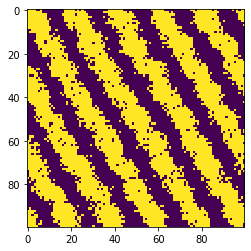

In [12]:
plt.imshow(X_test[1].reshape(100,100))

In [13]:
model.predict(X_test[:4])

array([[1.8111225e-18, 1.0000000e+00, 2.4681342e-13],
       [2.2072555e-19, 1.0000000e+00, 1.4420821e-13],
       [5.1731191e-04, 2.5759893e-14, 9.9948263e-01],
       [1.1050616e-19, 1.0000000e+00, 2.3063634e-12]], dtype=float32)

In [111]:
R_list = ['001','003','005','008','01','02','03','05','1','2','3','4','5', '6','7', '8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33'] # '18', '20', '22', '24', '26', '28', '30', '31', '32']
T_list = ['042', '055'] #,'045','050','055']

res = {}
for T in T_list:
    res[T] = {}
    for R in R_list:
        snap = 'snaps_R/snaps_T'+str(T)+'_R'+str(R)+'.npy'
        if path.isfile(snap):
            res[T].update({R:''})
            x_current = np.load(snap)
            x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
            #x_current = x_current[200:,:]
            x_current = x_current.reshape(x_current.shape[0],100,100,1)
            out = model.predict(x_current)
            res[T][R] = {0: np.mean(out[:,0]), 1: np.mean(out[:,1]), 2: np.mean(out[:,2])}
    


In [16]:
#res['042']
#plt.plot(res['042'])

{'001': {0: 0.54834884, 1: 1.682991e-09, 2: 0.4516512},
 '003': {0: 0.46351272, 1: 8.907317e-11, 2: 0.5364872},
 '005': {0: 0.45531636, 1: 1.5626077e-10, 2: 0.54468364},
 '008': {0: 0.45396838, 1: 2.7564925e-10, 2: 0.54603165},
 '01': {0: 0.97811455, 1: 3.7082892e-10, 2: 0.021885468},
 '02': {0: 0.24580991, 1: 9.93035e-11, 2: 0.7541901},
 '03': {0: 0.37634346, 1: 1.4229101e-09, 2: 0.6236565},
 '05': {0: 0.71340466, 1: 6.3944605e-12, 2: 0.28659534},
 '1': {0: 0.5446297, 1: 5.3021916e-15, 2: 0.4553703},
 '2': {0: 0.28105503, 1: 0.55452406, 2: 0.16442081},
 '4': {0: 0.50182843, 1: 4.557359e-15, 2: 0.49817163},
 '6': {0: 0.43190587, 1: 4.6112397e-15, 2: 0.56809413},
 '8': {0: 2.9740268e-19, 1: 1.0, 2: 4.588377e-12},
 '10': {0: 0.38978174, 1: 3.887696e-15, 2: 0.6102182},
 '12': {0: 1.0, 1: 3.7384557e-17, 2: 2.3406824e-10},
 '14': {0: 0.6412723, 1: 0.35872722, 2: 4.94016e-07},
 '16': {0: 0.99114513, 1: 0.0088538965, 2: 9.394448e-07},
 '20': {0: 0.43521702, 1: 2.0179563e-15, 2: 0.564783},
 '2

# Model predictions for T = 0.42

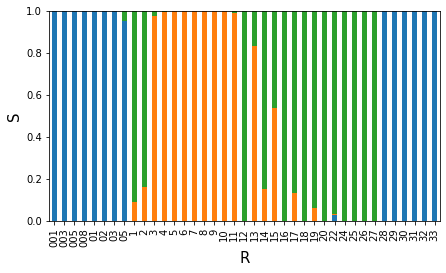

In [123]:
T = '042'
pd.DataFrame(res[T]).T.plot(kind='bar',stacked=True, figsize=(7,4), legend = False)
#plt.title("Kernel_size = 3, CNN, T = "+str(T),fontsize=20)

plt.ylim(0,1)
plt.xlabel('R',fontsize=15)
plt.ylabel('S',fontsize=15)
plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig('T042_CNN_3phases.png')
plt.savefig('T042_CNN_3phases.svg')
plt.savefig('T042_CNN_3phases.eps')


# Model predictions for T = 0.55

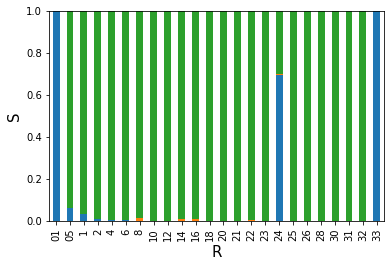

In [124]:
T = '055'
pd.DataFrame(res[T]).T.plot(kind='bar',stacked=True, figsize=(6,4), legend = False)
#plt.title("Kernel_size = 3, CNN, T = "+str(T),fontsize=20)

plt.ylim(0,1)
plt.xlabel('R',fontsize=15)
plt.ylabel('S',fontsize=15)
plt.gcf().subplots_adjust(bottom=0.15)

plt.savefig('T055_CNN_3phases.png')
plt.savefig('T055_CNN_3phases.svg')
plt.savefig('T055_CNN_3phases.eps')


# Activations for different values of shear (R) 

# 1. lamella to teared lamella (orange to green)

Text(0.5, 1.0, 'R = 11')

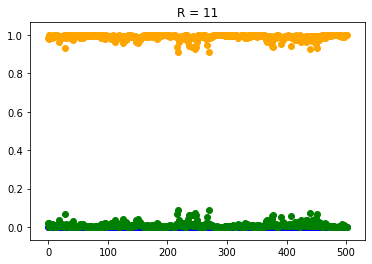

In [43]:
# plots activation function for all the used snapshots
R = '11'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 12')

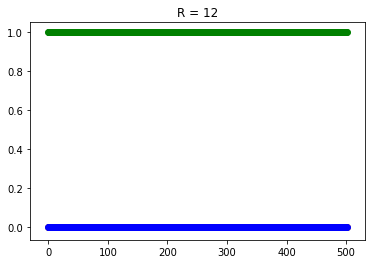

In [54]:
# plots activation function for all the used snapshots
R = '12'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 13')

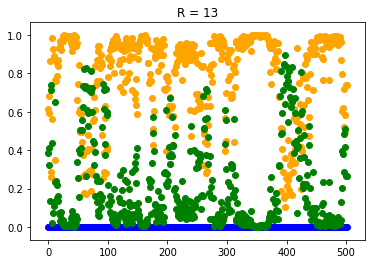

In [39]:
# plots activation function for all the used snapshots
R = '13'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 14')

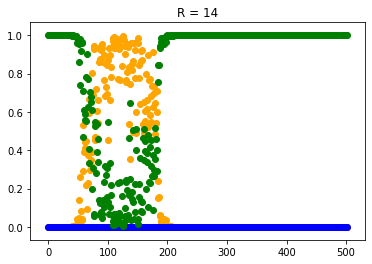

In [40]:
# plots activation function for all the used snapshots
R = '14'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 15')

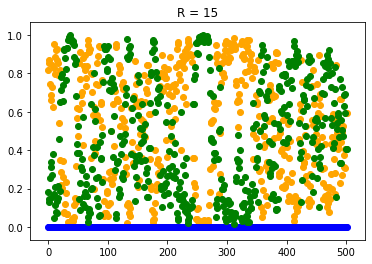

In [41]:
# plots activation function for all the used snapshots
R = '15'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 16')

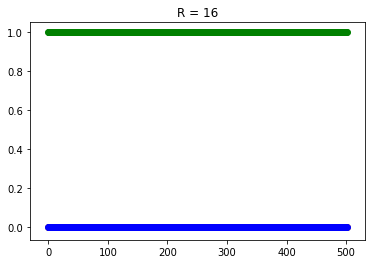

In [42]:
# plots activation function for all the used snapshots
R = '16'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 17')

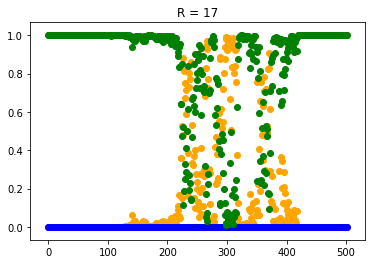

In [53]:
# plots activation function for all the used snapshots
R = '17'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

-----------------------------------------------------------
# Disorder to lamella (blue to orange through green)

Text(0.5, 1.0, 'R = 03')

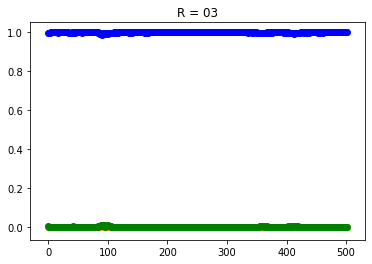

In [52]:
# plots activation function for all the used snapshots
R = '03'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 05')

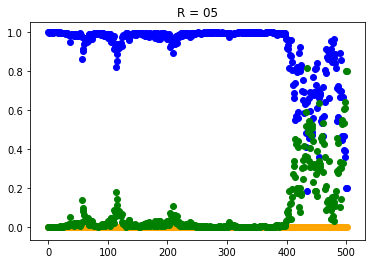

In [47]:
# plots activation function for all the used snapshots
R = '05'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 1')

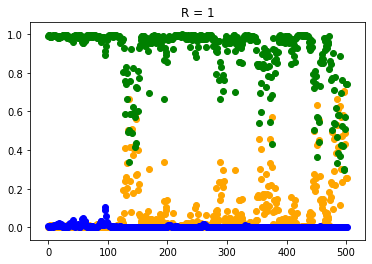

In [48]:
# plots activation function for all the used snapshots
R = '1'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 2')

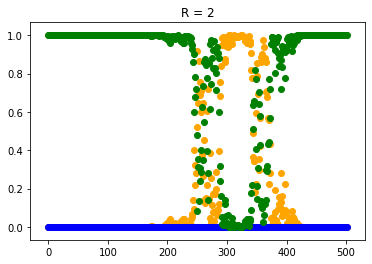

In [49]:
# plots activation function for all the used snapshots
R = '2'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 3')

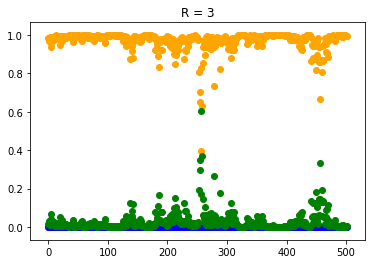

In [50]:
# plots activation function for all the used snapshots
R = '3'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)

Text(0.5, 1.0, 'R = 4')

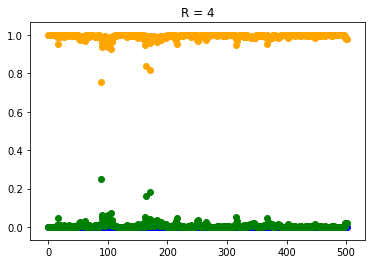

In [51]:
# plots activation function for all the used snapshots
R = '4'
snap = 'snaps_R/snaps_T042_R'+R+'.npy'
x_current = np.load(snap)
x_current = np.reshape(x_current,(num_of_snaps_in_file,visible_nodes))
x_current = x_current.reshape(x_current.shape[0],100,100,1)
out = model.predict(x_current)

plt.scatter(np.arange(len(out)),out[:,1],color='orange')
plt.scatter(np.arange(len(out)),out[:,0],color='blue')
plt.scatter(np.arange(len(out)),out[:,2],color='green')
plt.title('R = '+R)